<a href="https://colab.research.google.com/github/mismatchgit/PyTorch-tutorial-freecodecamp/blob/main/Pytorch_classification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Make Classification data & get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles
#Make 1000 samples
n_samples = 1000
#create circles
X, y = make_circles(n_samples,
                    noise = 0.03,                                              random_state=42)
len(X), len(y)

(1000, 1000)

In [2]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [3]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


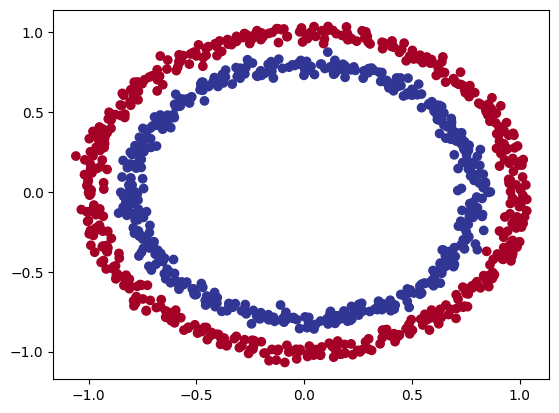

In [4]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

## Check Input and Output Shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
#view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample

(array([0.75424625, 0.23148074]), np.int64(1))

In [7]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

## Turn Data into Tensors and create train and test splits

In [8]:
import torch
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.dtype, y.dtype

(torch.float32, torch.float32)

In [9]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)
len(X_train),len(y_test)

(800, 200)

 ## Building a model to classify blue and red dot

In [10]:
from torch import nn
#device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
 #construct a model that subclasses nn.Module
 class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #create 2 nn.Linear layers capable of handling the data
    self.layer_1 = nn.Linear(in_features =2, out_features =5)
    self.layer_2 = nn.Linear (in_features=5, out_features =1)
  #Define a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) #x goes into layer 1 then to layer 2 and then output

#instantiate an instance of our model class and send it to target device
model_0 = CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
#send parameters to device(cpu or GPU)
next(model_0.parameters()).device

device(type='cpu')

In [13]:
#for visualizing the model above go to playground.tensorflow.org
#similar model but implemented with nn.sequential()
model_0n = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0n

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
# the sequential can be used in the nn.Module subclass also like below
class CircleModelSequential():
  def __init__(self):
    super().__init__()
    #2 layers using sequential instead of manually defining each layer
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  #override the forward method
  def forward(self, x):
    return self.two_linear_layers(x)

In [15]:
model_0n.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0870, -0.6532],
                      [ 0.6503, -0.2299],
                      [ 0.6272,  0.3959],
                      [-0.4849,  0.5363],
                      [ 0.1416,  0.5959]])),
             ('0.bias', tensor([-0.4088, -0.4188,  0.4866, -0.5368, -0.4426])),
             ('1.weight',
              tensor([[ 0.0166,  0.2535,  0.2575, -0.3908, -0.3352]])),
             ('1.bias', tensor([-0.2160]))])

In [16]:
#Make predictions without train
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length : {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"\nLength of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 Untrained Prediction: {untrained_preds[:10]}")
print(f"\nFirst 10 True Result or labels: {y_test[:10]}")

Length : 200, Shape: torch.Size([200, 1])

Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 Untrained Prediction: tensor([[-0.0491],
        [-0.0212],
        [-0.1627],
        [-0.0167],
        [-0.2271],
        [-0.2096],
        [-0.0801],
        [-0.1244],
        [-0.1598],
        [-0.0200]])

First 10 True Result or labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [17]:
# setting p loss function and optimizer

loss_function = nn.BCEWithLogitsLoss()#BCELoss() can also be used. But it requires inputs to have gone through the sigmoid activation function prior to input to BCELoss. BCEWithLogitLoss has sigmoid activation function built-in

#nn.BCEWithLogitsLoss() is similar to the following
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

optimizer = torch.optim.SGD(params=model_0n.parameters(),
                            lr= 0.01)

In [18]:
#calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = ((correct/len(y_pred))*100)
  return acc

Our model outputs are going to be raw logits.

We can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax().

In [19]:
#Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
#view first 5 output from the forward pass
model_0n.eval()
with torch.inference_mode():
  y_logits= model_0n(X_test.to(device))[:5]

y_logits

tensor([[-0.2778],
        [-0.1999],
        [-0.0552],
        [-0.3426],
        [ 0.6225]])

In [20]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [21]:
#use the sigmoid activation function on logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4310],
        [0.4502],
        [0.4862],
        [0.4152],
        [0.6508]])

In [22]:
y_pred_probs = torch.nn.Sigmoid(y_logits)
y_pred_probs

TypeError: Sigmoid.__init__() takes 1 positional argument but 2 were given

In [24]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([ True,  True,  True,  True, False])


tensor([0., 0., 0., 0., 1.])

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
#Building a training and testing loop
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
    # 2. Calculate loss/accuracy
    # loss = loss_function(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_function(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_function(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 10 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 20 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 30 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 40 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 50 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 60 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 70 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 80 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%
Epoch: 90 | Loss: 0.69559, Accuracy: 50.00% | Test loss: 0.69822, Test acc: 50.00%


In [27]:
#Implementation of plot decision boundary by hand
def plot_decision_boundary_by_hand(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [28]:
#or the same can be done with the following method (downloading from others github repo)
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



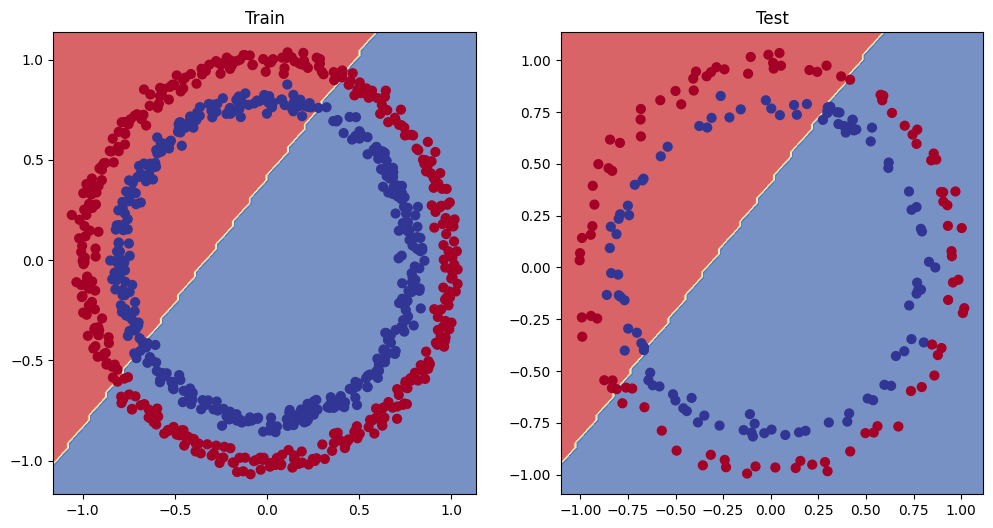

In [30]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0n, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0n, X_test, y_test)